<a href="https://colab.research.google.com/github/shi5a/MovieRecommender/blob/main/Recommender_System1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
---

**Recommender System:**
* One of the most popular data science applications
* It's widely used and extremely helpful!
* It can be applied for many ideas, and it have wide variety of applications
* Can predict or offer services/products to the users/customers
* That can be done based on their past purchase, browsing history, their type/classification, or any products' attributes


**Data Science Bootcamp Final Project:**

In this project, I will build a **Movie Recommender System** with Python.

* It employs a machine learning algorithm, which predicts the  title for a movie that the user may like

* It will be based on similarities of the movies' attributes

* It uses the correlation between the attributes assigned to different movies


I hope you will enjoy it,

Shaikha AlBilais

# **Setup**
---

This section includes:

1.   Libraries Importing 
2.   Data Uploading

Libraries Importing 

In [62]:
import pandas as pd
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import *

from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

print('Libraries Importing Completed.')

Libraries Importing Completed.


Color Formatting

In [63]:
sns.set_palette("deep")

Data Uploading

In [64]:
movie = pd.read_csv('https://raw.githubusercontent.com/shi5a/MovieRecommender/main/movies.csv')
rate = pd.read_csv('https://raw.githubusercontent.com/shi5a/MovieRecommender/main/ratings.csv')
print('Data Uploading Completed.')

Data Uploading Completed.


# **1- Exploratory Data Analysis (EDA)**
---

This section includes:


1. Data Understanding
2. Data Exploration
3. Data Visualization

## **1.1 Data Understanding**

In [20]:
print("The head of Movie Set:")
movie.head(2)

The head of Movie Set:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


* **Noticed:**
1. Each row corresponds to a movie 
2. It contains info about the movie: ID, title, and genre

* **Problem:** The needed things to generate a recommender system are missing! (User ID & his ratings)


---



In [21]:
print("The head of Rate Set:")
rate.head(2)

The head of Rate Set:


,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807


In [22]:
print("Rating values::")
rate.rating.unique()

Rating values::


array([4. , 1.5, 3. , 0.5, 4.5, 2.5, 3.5, 5. , 2. , 1. ])

* **Noticed:**
1. Each row corresponds to one user's `rating` of a movie
2. It includes the `userId`, the `movieId`, and his rating timing
2. Ratings can have values between 0.5 and 5

* **Problem:** It contains only the movied IDs without their titles, which it needed to be recommended to the user.



## **Merging the 2 sets**

The merging is needed to get all the desired information in one dataset.

* Since the ```movieID```
is the common column between the two of them, it will be used via ```merge()``` function from Pandas library.




In [67]:
movies = pd.merge(rate, movie, on='movieId')
print("The head of the new merged Set:")
movies.head()

The head of the new merged Set:


,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


## **1.2 Data Exploration**

In [ ]:
print("[Some General Info About The New Dataset]")
print("\nshape:", movies.shape,"\n\n",'-' * 20)
print("\nNumber of features:", len(movies.columns),"\n\n",'-' * 20)
print("\nFeature Names:\n", movies.columns,"\n\n",'-' * 20)
print("\nDatatypes of features:\n", movies.dtypes)

[Some General Info About The New Dataset]

shape: (105339, 6) 

 --------------------

Number of features: 6 

 --------------------

Feature Names:
 Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object') 

 --------------------

Datatypes of features:
 userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
dtype: object


In [ ]:
print("Some stat. info about the continuous data in the dataset:")
movies.describe()

Some stat. info about the continuous data in the dataset:


,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


* **From the above table:**

1. The average rating is 3.5
2. The minimum and maximum ratings are 0.5 and 5 respectively
3. There are 668 users, who have given their ratings, for 149532 movies

In [ ]:
print("Number of Movies in the Dataset: ", len(movies['movieId'].unique()), " movies",
      "\nNumber of Users in the Dataset: ",len(movies['userId'].unique()), " users")

Number of Movies in the Dataset:  10325  movies 
Number of Users in the Dataset:  668  users


In [ ]:
print("Is there any Empty cells or Nans in the datasets?\n ",
      movies.isnull().values.any())

Is there any Empty cells or Nans in the datasets?
  False


Is there any outliers in the datasets?
 


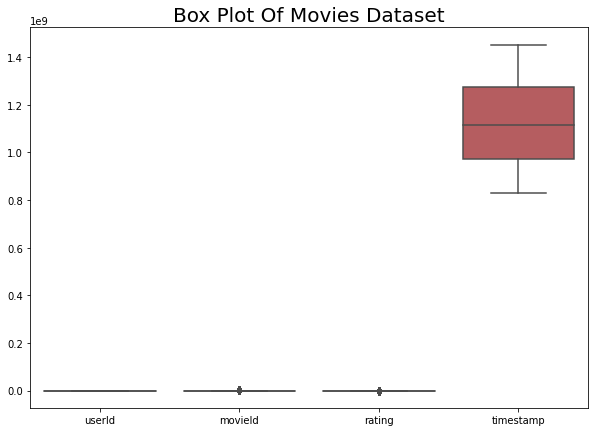

In [ ]:
print("Is there any outliers in the datasets?\n ")
fig=plt.figure(figsize=(10,7))
sns.boxplot(data=movies, palette='deep')
plt.title('Box Plot Of Movies Dataset',fontsize=20)
plt.show()

* **From the above box plot:**

    There is no outliers that needed to be removed.

## **1.3 Data Visualization**

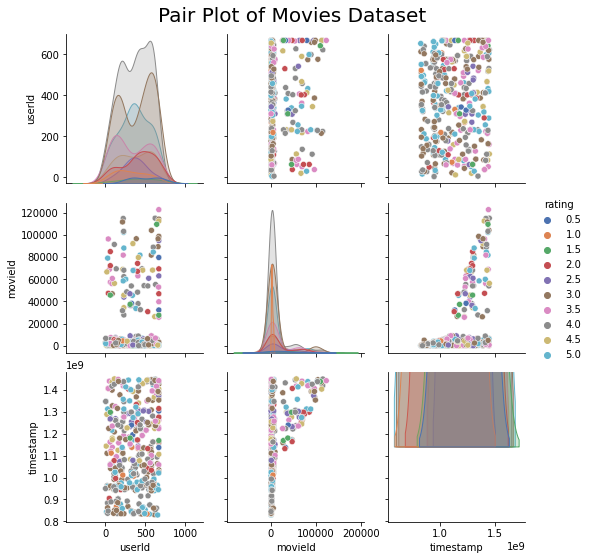

In [ ]:
p = sns.pairplot(movies.sample(500), hue='rating', palette='deep')
p.fig.suptitle("Pair Plot of Movies Dataset", y=1.03,fontsize=20)
plt.show()

* **About the above pair plot:**
1. Plotting pairwise relationships in 500 samples from the movies dataset
2. With excluding the ‘target’ (rating) as a hue


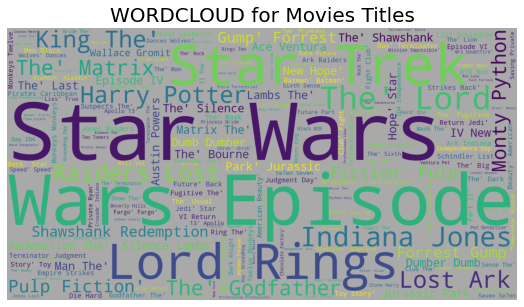

In [ ]:
movie_title=[]
for title in movies.title: movie_title.append(title[0:-7])
movie_title=str(movie_title) 

wordcloud_title=WordCloud(width=1500,height=800,min_font_size=2, background_color='darkgray').generate(movie_title)

plt.figure(figsize=(10,5))
plt.axis('off')
plt.title('WORDCLOUD for Movies Titles', fontsize=20)
plt.imshow(wordcloud_title)

* **About the above Wordcloud:**
1. It composed of the movie titles in the dataset, in which the size of each word indicates its frequency or importance
2. The more a specific title appears and repeated in the dataset, the bigger and bolder it appears in the word cloud. 

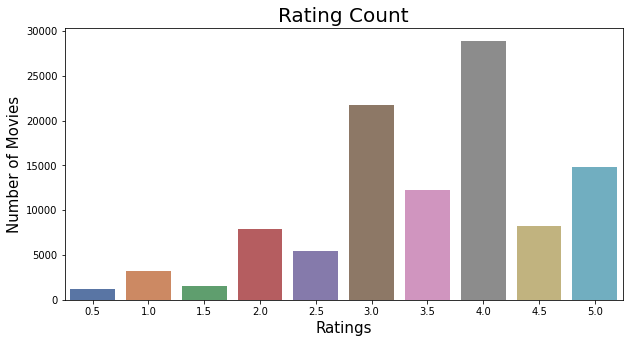

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=movies, palette='deep')
plt.title('Rating Count',fontsize=20)
plt.ylabel('Number of Movies',fontsize=15)
plt.xlabel('Ratings',fontsize=15)
plt.show()

In [ ]:
df_ratings_cnt_tmp = pd.DataFrame(movies.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tmp

,count
rating,
0.5,1198
1.0,3258
1.5,1567
2.0,7943
2.5,5484
3.0,21729
3.5,12237
4.0,28880
4.5,8187


* **Noticed from the above count plot & table:**
1. Most of the rated movies are having a rate of 4.0
2. Only 1198 Movies that have a rate of 0.5   (lowest rate)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Movie Title')

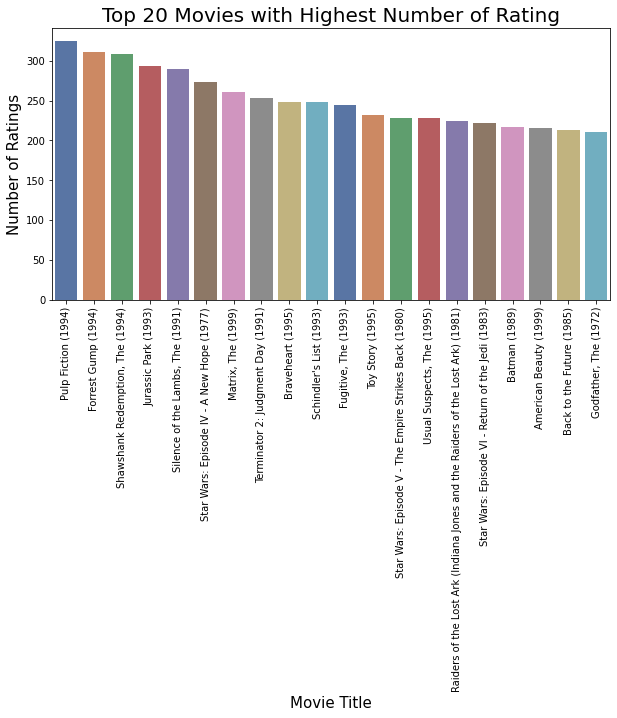

In [ ]:
df=movies.groupby('title')[['rating']].count()
rating_count_20=df.nlargest(20,'rating')

plt.figure(figsize=(10,5))
plt.title('Top 20 Movies with Highest Number of Rating',fontsize=20)

plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)

sns.barplot(rating_count_20.index,rating_count_20.rating, palette='deep')
plt.ylabel('Number of Ratings',fontsize=15)
plt.xlabel('Movie Title',fontsize=15)

* **Noticed from the above count plot:**
  
  The movie that has the highest number of users' ratings is Pulp Fiction (1994)

# **2- Data Preparation**


---


This section includes:
1. Data Preprocessing 
2. Data Splitting
3. Data Scaling

## **2.1 Data Preprocessing**

**2.1.1 Data Cleaning**

* Seperating `genres` among "|"

In [68]:
movies.genres = movies.genres.str.split("|")
print('Head of movies Dataset After Seperating genres:\n')
movies.head(1)

Head of movies Dataset After Seperating genres:



,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),"[Crime, Drama]"


**2.1.2 Features Extraction**

* Creating a **new feature**: ```year```

    1- Represents the year that the movie was released in
    
    2- Will be extracted from the ```title``` feature

In [69]:
movies["year"] = movies.title.str.extract('(\(\d\d\d\d\))',expand=False) #seperate it from parantheses.
movies["year"] = movies.year.str.extract('(\d\d\d\d)', expand = False) #remove parantheses
movies["title"] = movies.title.str.replace('(\(\d\d\d\d\))','')
movies.title = movies.title.str.strip()

print('Head of movies Dataset After splitting title & year:\n')
movies.head(1)

Head of movies Dataset After splitting title & year:



,userId,movieId,rating,timestamp,title,genres,year
0,1,16,4.0,1217897793,Casino,"[Crime, Drama]",1995


* Creating a **new features**:

    1- To separate each genre type in a new attribute
    
    2- Will be extracted from the ```genres``` feature
    
    3- Genres of a movie will be in one-hot encoding format

In [70]:
movies_genres = movies.copy()

for index, row in movies.iterrows():
    for genre in row["genres"]:
        movies_genres.at[index, genre] = 1
movies_genres = movies_genres.fillna(0)

print('Head of movies After splitting the types into new attributes:\n')
movies_genres.head(1)

Head of movies After splitting the types into new attributes:



,userId,movieId,rating,timestamp,title,genres,year,Crime,Drama,Sci-Fi,Mystery,Thriller,Action,War,Adventure,IMAX,Comedy,Romance,Western,Horror,Fantasy,Musical,Film-Noir,Children,Animation,Documentary,(no genres listed)
0,1,16,4.0,1217897793,Casino,"[Crime, Drama]",1995,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


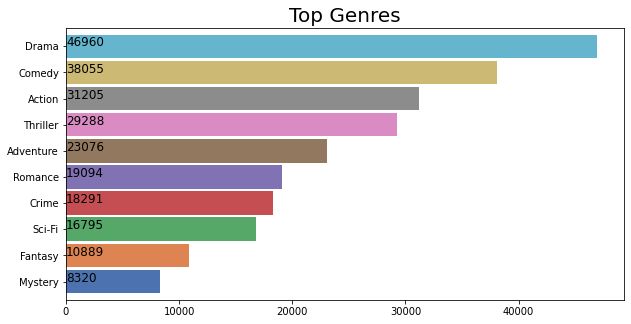

In [71]:
plt.subplots(figsize=(10,5))
list1 = []

for i in movies['genres']: list1.extend(i)

ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('deep'))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): ax.text(.8, i, v,fontsize=12)

plt.title('Top Genres',fontsize=20)
plt.show()

* **About the above count plot:**
1. It shows the count of the top 10 genre that the movies in this dataset are catorized.
2. The genre that represents the higher number of movies is `Drama`

In [72]:
movies1 = movies_genres.drop("genres", axis=1)
print('Sample of movies After splitting the types into new attributes:\n')
movies1.sample(2)

Sample of movies After splitting the types into new attributes:



,userId,movieId,rating,timestamp,title,year,Crime,Drama,Sci-Fi,Mystery,Thriller,Action,War,Adventure,IMAX,Comedy,Romance,Western,Horror,Fantasy,Musical,Film-Noir,Children,Animation,Documentary,(no genres listed)
61686,326,225,4.0,844184062,Disclosure,1994,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63140,331,1029,3.5,1138985165,Dumbo,1941,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [73]:
print("[Some General Info. About The New Preprocessed Dataset]")
print("\nshape:", movies1.shape,"\n\n",'-' * 20)
print("\nNumber of features:", len(movies1.columns),"\n\n",'-' * 20)
print("\nFeature Names:\n", movies1.columns,"\n\n",'-' * 20)
print("\nDatatypes of features:\n", movies1.dtypes)

[Some General Info. About The New Preprocessed Dataset]

shape: (105339, 26) 

 --------------------

Number of features: 26 

 --------------------

Feature Names:
 Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'year', 'Crime',
       'Drama', 'Sci-Fi', 'Mystery', 'Thriller', 'Action', 'War', 'Adventure',
       'IMAX', 'Comedy', 'Romance', 'Western', 'Horror', 'Fantasy', 'Musical',
       'Film-Noir', 'Children', 'Animation', 'Documentary',
       '(no genres listed)'],
      dtype='object') 

 --------------------

Datatypes of features:
 userId                  int64
movieId                 int64
rating                float64
timestamp               int64
title                  object
year                   object
Crime                 float64
Drama                 float64
Sci-Fi                float64
Mystery               float64
Thriller              float64
Action                float64
War                   float64
Adventure             float64
IMAX              

**2.1.3 Categorical Encoding**

* **Converting `year` type to int:**

In [74]:
movies1["year"] = movies1["year"].astype(str).astype(int)
movies1.year

0         1995
1         1995
2         1995
3         1995
4         1995
          ... 
105334    2015
105335    2015
105336    2014
105337    2015
105338    2015
Name: year, Length: 105339, dtype: int64

* **Converting `title` type to int:**

In [75]:
titles = [i for i in movies1['title'].unique()]
idx = [i for i in range(len(titles))]

titles_dict = {titles[i]:idx[i] for i in range(len(idx))}

In [76]:
titles_col = [titles_dict[v] for v in movies1.title.values]
titles_col = pd.Series(titles_col)
titles_col.unique()[::5]

array([    0,     5,    10, ...,  9995, 10000, 10005])

In [77]:
movies1['titles_ints'] = titles_col

In [78]:
movies2 = movies1.drop("title", axis=1)
print('Sample of movies After converting the type "year" & "title":\n')
movies2.head(2)

Sample of movies After converting the type "year" & "title":



,userId,movieId,rating,timestamp,year,Crime,Drama,Sci-Fi,Mystery,Thriller,Action,War,Adventure,IMAX,Comedy,Romance,Western,Horror,Fantasy,Musical,Film-Noir,Children,Animation,Documentary,(no genres listed),titles_ints
0,1,16,4.0,1217897793,1995,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,16,4.0,842686699,1995,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [79]:
print('The Features types:\n')
movies2.dtypes

The Features types:



userId                  int64
movieId                 int64
rating                float64
timestamp               int64
year                    int64
Crime                 float64
Drama                 float64
Sci-Fi                float64
Mystery               float64
Thriller              float64
Action                float64
War                   float64
Adventure             float64
IMAX                  float64
Comedy                float64
Romance               float64
Western               float64
Horror                float64
Fantasy               float64
Musical               float64
Film-Noir             float64
Children              float64
Animation             float64
Documentary           float64
(no genres listed)    float64
titles_ints             int64
dtype: object

## **2.2 Features Extraction & Data Splitting**


**2.2.1 Features Extraction**

* Ploting **Correlation Matrix** of the dataset, that may help with deciding which features are better for the data splitting

In [84]:
corr=movies2.corr()
corr.style.background_gradient(cmap='coolwarm')

,userId,movieId,rating,timestamp,year,Crime,Drama,Sci-Fi,Mystery,Thriller,Action,War,Adventure,IMAX,Comedy,Romance,Western,Horror,Fantasy,Musical,Film-Noir,Children,Animation,Documentary,(no genres listed),titles_ints
userId,1.000000,0.089403,-0.044781,0.039862,-0.014982,-0.002273,0.028252,-0.018739,-0.004415,-0.005088,-0.021835,0.003415,-0.029910,-0.005292,-0.025842,-0.013646,0.008007,0.010927,-0.017500,-0.010619,0.012279,-0.026222,-0.022978,0.020749,0.006124,0.243897
movieId,0.089403,1.000000,-0.025446,0.518283,0.260610,0.025788,0.027923,0.039558,0.023000,0.042046,0.049653,-0.013511,-0.005197,0.259789,-0.052097,-0.053601,-0.015805,0.005653,0.003847,-0.045632,-0.005302,-0.032324,0.039959,0.075798,0.039320,0.360675
rating,-0.044781,-0.025446,1.000000,0.002697,-0.066076,0.055077,0.114520,-0.025997,0.037890,-0.012644,-0.040609,0.061690,0.000597,0.020590,-0.068992,0.012341,0.007005,-0.064610,-0.005327,0.010864,0.040936,-0.021383,0.027788,0.012996,-0.003475,-0.180831
timestamp,0.039862,0.518283,0.002697,1.000000,0.160225,0.044377,-0.010251,0.057608,0.030964,0.035861,0.073984,0.000756,0.039925,0.146901,-0.029675,-0.059208,-0.024549,0.022950,0.041151,-0.039274,-0.002958,-0.014914,0.050374,0.038446,0.014142,0.162012
year,-0.014982,0.260610,-0.066076,0.160225,1.000000,0.038708,-0.010329,0.035407,0.007998,0.086663,0.090607,-0.051759,0.016479,0.109262,0.027084,-0.016159,-0.050406,-0.007740,0.003097,-0.119995,-0.092963,-0.028023,0.011600,0.036667,-0.103547,-0.016249
Crime,-0.002273,0.025788,0.055077,0.044377,0.038708,1.000000,0.069221,-0.146586,0.127607,0.282448,0.094054,-0.087365,-0.175587,-0.015960,-0.081901,-0.157722,-0.050917,-0.061472,-0.117119,-0.086171,0.143675,-0.107917,-0.076213,-0.048153,-0.003737,-0.049513
Drama,0.028252,0.027923,0.114520,-0.010251,-0.010329,0.069221,1.000000,-0.209267,0.008140,-0.071213,-0.246880,0.181943,-0.263121,-0.053649,-0.273974,0.106983,-0.011542,-0.143019,-0.149451,-0.059170,-0.006348,-0.143896,-0.132503,-0.081619,-0.007311,0.082745
Sci-Fi,-0.018739,0.039558,-0.025997,0.057608,0.035407,-0.146586,-0.209267,1.000000,0.000719,0.114334,0.295653,-0.093489,0.229831,0.121531,-0.165318,-0.157400,-0.032365,0.076644,-0.067811,-0.078680,-0.031373,-0.052188,-0.015841,-0.046626,-0.003550,-0.117438
Mystery,-0.004415,0.023000,0.037890,0.030964,0.007998,0.127607,0.008140,0.000719,1.000000,0.286096,-0.062337,-0.067790,-0.092894,-0.000521,-0.160737,-0.066158,-0.029720,0.099810,-0.021856,-0.058535,0.164636,-0.058876,-0.044953,-0.030191,-0.002387,-0.031693
Thriller,-0.005088,0.042046,-0.012644,0.035861,0.086663,0.282448,-0.071213,0.114334,0.286096,1.000000,0.262234,-0.092533,-0.048767,-0.005703,-0.330275,-0.169670,-0.070453,0.164003,-0.131299,-0.125031,0.079454,-0.177334,-0.143255,-0.066186,-0.005059,-0.072809


**2.2.2 Data Splitting**

In [85]:
X = movies2.drop(['userId',"titles_ints",'timestamp'], axis=1)
y = movies2.titles_ints

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=7)
print('Features split completed.')

Features split completed.


## **2.3 Data Scaling**

In [86]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
print("Training data are scaled.")

Training data are scaled.


In [87]:
X_test = ss.fit_transform(X_test)
print("Testing data are scaled.")

Testing data are scaled.


# **3- Data Modeling**
---

This section includes:


1. Baseline Model
2. K-Nearest-Neighbors Classifier Model
5. Findings


## **3.1 Baseline Model**

In [88]:
def baseline_model(n_predictions, value_to_predict):
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)
baseline_value = y_train.value_counts().index[0]

baseline_preds = baseline_model(n_predictions, baseline_value)
print('Baseline predections are:\n', baseline_preds)

Baseline predections are:
 0        15
1        15
2        15
3        15
4        15
         ..
21063    15
21064    15
21065    15
21066    15
21067    15
Length: 21068, dtype: int64


In [89]:
bl_acc = accuracy_score(y_test , baseline_preds)
print('BaseLine Accurecy Score = ' , bl_acc*100,'%')

BaseLine Accurecy Score =  0.2705524966774255 %


## **3.2 K-Nearest-Neighbors (KNN) Classifier Model**

In [90]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('KNN model fit completed.')

KNN model fit completed.


In [91]:
knn_perds1 = knn.predict(X_test)
print('KNeighbors Classifier Predections Are:\n', knn_perds1)

KNeighbors Classifier Predections Are:
 [1386 1661   41 ...   62  225  423]


In [92]:
knn_acc1 = accuracy_score(y_test, knn_perds1)
print('KNeighbors Classifier Accurecy Score = ' , knn_acc1*100,'%')

KNeighbors Classifier Accurecy Score =  48.48110879058287 %


## **3.3 Findings**

**3.5.1 Baseline Vs. KNN Cmparisions**

In [95]:
print('The accurecy score of Baseline Model is: ', bl_acc*100,'%')
print('\nWhile the accuracy score of the KNN Model is: ', knn_acc1*100,'%')
a =(knn_acc1-bl_acc)*100
print('\nThe KNN score had beat the Baseline score by: ', a,'%')

The accurecy score of Baseline Model is:  0.2705524966774255 %

While the accuracy score of the KNN Model is:  48.48110879058287 %

The KNN score had beat the Baseline score by:  48.21055629390545 %


# **4- Data Optimization and Validation**
---

This section includes:


1. GridSearchCV Selector
2. Randomized SearchCV Selector
3. Findings (Model Determination)

## **4.1 GridSearchCV Selector**


GridSearchCV with KNN Model

In [96]:
p_grid = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

grid = GridSearchCV(knn, p_grid, cv=10,n_jobs=-1)

In [97]:
grid.fit(X_train, y_train)
print('GridSearchCV fit Completed.')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV fit Completed.


In [99]:
print('GridSearchCV best parameters are:\n', grid.best_params_)

GridSearchCV best parameters are:
 {'algorithm': 'brute'}


In [100]:
#repeating the KNN model with the parameters
KNeighborsClassifier(algorithm= 'brute')
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)
print('KNN model fit completed.')

KNN model fit completed.


In [102]:
knn_perds2 = knn.predict(X_test)
print('KNeighbors Classifier Predections Are:\n', knn_perds2)

KNeighbors Classifier Predections Are:
 [1386 1661   41 ...   62  225  423]


In [103]:
knn_acc2 = accuracy_score(y_test, knn_perds2)
print('KNeighbors Classifier Accurecy Score After GridSearchCV Optimization = ' , knn_acc2*100,'%')

KNeighbors Classifier Accurecy Score After GridSearchCV Optimization =  48.48110879058287 %


## **4.4 Findings (Model Determination)**

In [112]:
best_score= {'baseline model':bl_acc,
                 'KNN model':knn_acc1,
                 'KNN model After GridSearchCV Optimization':knn_acc2}

max_key = max(best_score, key=best_score.get)
max_value = best_score[max_key]

print(' Baselain score:',bl_acc*100,'%\n','KNN score:',knn_acc1*100,'%\n','KNN After GridSearchCV Optimization: ',knn_acc2*100,'%\n')
print(f'The {max_key} has the highest accuracy score: {max_value*100}','%')

 Baselain score: 0.2705524966774255 %
 KNN score: 48.48110879058287 %
 KNN After GridSearchCV Optimization:  48.48110879058287 %

The KNN model has the highest accuracy score: 48.48110879058287 %
